# NUS Student SMS Chat Analysis

Here the goal is to create a model that can classify text to explore the sentiment present and compare the general sentiment of messages between countries in the NUS SMS Corpus.

This dataset contains 67,093 text messages (SMSs) taken from the corpus on Mar 9, 2015 and is mostly comprised of messages from Singaporeans and students attending the University.

## Examining the dataset

In [444]:
import pandas as pd

In [445]:
df = pd.read_csv('clean_nus_sms.csv',index_col=0)
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48598 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48598 non-null  object
 3   country  48598 non-null  object
 4   Date     48598 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


## Text preprocessing

### Remove Row with Empty Message

In [447]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48595 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48595 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48595 non-null  object
 3   country  48595 non-null  object
 4   Date     48595 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


### Lowercasing the Message Data

In [448]:
df['Message_clean'] = df['Message'].str.lower()
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### Remove Punctuation

In [449]:
df['Message_clean'] = df['Message_clean'].str.replace('[^\w\s]','')
df.head()

C:\Users\chyij\AppData\Local\Temp\ipykernel_13992\3515539374.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Message_clean'] = df['Message_clean'].str.replace('[^\w\s]','')


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Remove Stopwords

Removing stopwords is an effective approach when conducting most NLP techniques. However, for sentiment analysis, valuable information could be lost when stopwords are removed. I'll take a look at the English stopwords in NLTK to determine if it would be best to remove them.

In [450]:
import nltk
from nltk.corpus import stopwords

In [451]:
#nltk.download('stopwords',download_dir='C:/Users/chyij/OneDrive/Python_project/Biodiversity_project/env/Lib/site-packages')
#nltk.data.path.append('C:\\Users\\chyij\\OneDrive\\Python_project\\Biodiversity_project\\env\\Lib\\site-packages\\nltk_data')

In [452]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'itself', 'hasn', 'your', "should've", 'won', "hasn't", 'about', 'by', 'their', 'couldn', 'in', 'most', 'very', 'shouldn', 'having', 'had', 'me', 'we', 'yourself', 'don', 'yours', 'but', "couldn't", 'isn', 'he', 'has', 'have', 'off', 'how', 'once', 'up', 'a', 'out', "you've", 'with', 'were', 'as', 'hers', 's', 'needn', 'him', 'until', 'than', "haven't", 'its', 'under', 'does', 'own', 'who', "mightn't", 'herself', 'where', 'while', 'wouldn', 'same', 'some', 'of', 'only', 'ours', 'that', 're', 'whom', "it's", 'the', 'other', "hadn't", 'few', "doesn't", 'haven', 'doing', "you'll", 'am', 'mustn', 'are', 'd', 'her', 'why', 'hadn', 'was', 'above', 'from', 'over', 'being', "aren't", "wasn't", 'each', 'an', "needn't", 'all', 'to', 'you', 'when', "won't", 'm', 'this', 'wasn', 'which', 'ourselves', 'so', "wouldn't", 'will', 'more', 'been', 'for', 'between', 'can', 'i', "that'll", "shan't", 'during', 'didn', "didn't", 'they', 'and', 'further', 'at', "mustn't", 'weren', 'did', 'those', 'against',

The stopwords might be useful for our sentiment analysis later. Thus, I will leave it as it is.

### Remove URLs

In [453]:
import re

In [454]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S')
    return url_pattern.sub(r'',text)
    #return re.sub(r'https?://\S+|www\.\S','',text)

In [455]:
df['Message_clean'] = df['Message_clean'].apply(lambda text: remove_urls(text))
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Remove HTML

In [456]:
def remove_html(text):
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub(r'',text)

In [457]:
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Tokenized Cleaned Message

In [458]:
from nltk.tokenize import word_tokenize

In [459]:
#nltk.download('punkt',download_dir='C:/Users/chyij/OneDrive/Python_project/Biodiversity_project/env/Lib/site-packages/nltk_data')

In [460]:
df['Message_tokenized'] = df['Message_clean'].apply(lambda text: word_tokenize(text))
df.head()

,id,Message,length,country,Date,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]"
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai..."
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"


In [461]:
# Save the preprocessed DataFrame
df.to_csv('processed_clean_nus_sms.csv', header = True)

## Exploratory Data Analysis

In [462]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [463]:
df['country'].nunique()

40

In [464]:
df['country'].value_counts()

Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Australia     

The values in `country` need to be cleaned as they are quite disorganised. For instance, `SG` represents the country code for Singapore but they have their own values. The same goes to `USA` and United States as well.

In [465]:
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}
                                                })

In [466]:
#count the real number of unique countries
df['country'].nunique()

33

### Visualising Top Ten Most Frequently Occuring Countries

<AxesSubplot:>

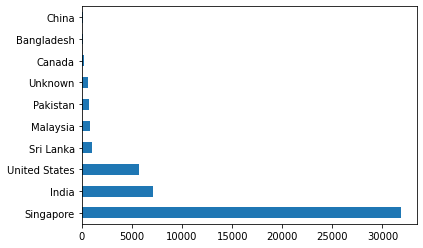

In [467]:
# Number of messages per country
country_value_counts = df['country'].value_counts()

# Number of messages per country for the top 10 most active countries
top_ten_country = country_value_counts.head(10)

top_ten_country.plot.barh()



Here I can know that majority of users from 'Singapore', 'India' and 'United States' sent messages.

## Sentiment Analysis

Now that I have conducted some light EDA, I will move on to sentiment analysis. There are several approaches one can take to analyzing sentiment of text data, and I will primarily use models from the NLTK library. Here a message will be categorized into one of two categories:

* Positve
* Negative

I will use Naive Bayes classification to determining the sentiment of the messages in the `Message` variable. This will involve using Twitter data with known sentiments to create a classifier. 

In [468]:
#nltk.download('twitter_samples',download_dir='C:/Users/chyij/OneDrive/Python_project/Biodiversity_project/env/Lib/site-packages/nltk_data')
#nltk.download('averaged_perceptron_tagger',download_dir='C:/Users/chyij/OneDrive/Python_project/Biodiversity_project/env/Lib/site-packages/nltk_data')
#nltk.download('wordnet',download_dir='C:/Users/chyij/OneDrive/Python_project/Biodiversity_project/env/Lib/site-packages/nltk_data')

In [469]:
# Import twitter_samples
from nltk.corpus import twitter_samples 

In [470]:
# Inspect the samples
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

My first step is to instantiate the tweets that have been labeled as positive and negative, in order to create a training set that can be fed into the classifier.

In [471]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [472]:
print('There are {} positive tweets and {} negative tweets'.format(len(positive_tweets),len(negative_tweets)))


There are 5000 positive tweets and 5000 negative tweets


So, the positive and negative dataset are distributed evenly and we have a dataset of 10000 tweets. The third file contains another 20000, which are not categorized.

In [473]:
print(positive_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


In [474]:
print(negative_tweets[:5])

['hopeless for tmr :(', "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(", '@Hegelbon That heart sliding into the waste basket. :(', '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too', 'Dang starting next week I have "work" :(']


Since I remove HTML tags and URLs in the SMS data, I will do the same for Twitter data. i will leave the symbols like `:)` or `:(` as they are good predictors for sentiment analysis.

In [475]:
from nltk.corpus import wordnet
from collections import Counter
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [476]:
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  pos_counts = Counter()

  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

In [477]:
def remove_symbols(text):
    symbols = re.compile(r'[^\w\s]')
    return symbols.sub(r'',str(text))

In [478]:
def preprocess(text):
    cleaned_tweet_list = []
    for token in text:
        token_lowercased = token.lower()
        url_cleaned = remove_urls(token_lowercased)
        html_cleaned = remove_html(url_cleaned)
        #symbol_cleaned = remove_symbols(html_cleaned)
        lemmatized_word = lemmatizer.lemmatize(html_cleaned,get_part_of_speech(html_cleaned))
        cleaned_tweet_list.append(lemmatized_word)
    return cleaned_tweet_list

In [479]:
#nltk.download('omw-1.4',download_dir='C:/Users/chyij/OneDrive/Python_project/Biodiversity_project/env/Lib/site-packages/nltk_data')

In [480]:
# Create tokens from the positive tweets
pos_tweet_tokens = [preprocess(tweet) for tweet in twitter_samples.tokenized('positive_tweets.json')]

# Show the first tokenized tweet
print(pos_tweet_tokens[:2])

# Create tokens from the positive tweets
neg_tweet_tokens = [preprocess(tweet) for tweet in twitter_samples.tokenized('negative_tweets.json')]

# Show the first tokenized tweet
print(neg_tweet_tokens[:2])

[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)'], ['@lamb2ja', 'hey', 'james', '!', 'how', 'odd', ':/', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'many', 'thanks', '!']]
[['hopeless', 'for', 'tmr', ':('], ['everything', 'in', 'the', 'kid', 'section', 'of', 'ikea', 'be', 'so', 'cute', '.', 'shame', "i'm", 'nearly', '19', 'in', '2', 'month', ':(']]


Now I need to select the features for my classifier. I will select the most common words in my corpus because I assume that these words are the best indicators if something is positive or negative. I will use a frequency distribution to select them.

In [481]:
#create a list of all the tweets
list_of_all_tweets = pos_tweet_tokens + neg_tweet_tokens

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130058

In [482]:
#create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print(len(all_tokens))
print(all_tokens.most_common(10))

#select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

#check what this list looks like
sentiment_features[:5]

18423
[(':(', 4586), (':)', 3693), ('i', 3300), ('be', 2689), ('!', 2675), ('.', 2433), ('you', 2207), ('to', 2190), ('the', 2004), ('a', 1761)]


[':(', ':)', 'i', 'be', '!']

In [483]:
def document_features(document, sentiment_features):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all my features, check if that feature is in my target message
    for token in sentiment_features:
        #make a dictionary for each message 
        features[token] = (token in document_tokens)
    return features

#test it on a sample sentence
# test_sentence = "coding is fun with codecademy :)".split(" ")
# print(document_features(test_sentence, sentiment_features))

## Creating Training and Testing Sets

Here, 70% of the tweets will be used for the training set, and 30% for the testing set. Using the `random` library, I can randomly select the tweets for each.

In [484]:
import random

In [485]:
pos_tag_tweet = [(word,'Positive') for word in pos_tweet_tokens]
neg_tag_tweet = [(word,'Negative') for word in neg_tweet_tokens]

all_tag_tweets = pos_tag_tweet + neg_tag_tweet

In [486]:
# Initialize the random number so I get the same result every time
random.seed(42)

# Shuffle the order of the dataset NOTE that the random method applies in place
random.shuffle(all_tag_tweets)

# Create a list of (token, sentiment) pairs for all the features in the tweets
features_set = [(document_features(word, sentiment_features),sentiment) for (word, sentiment) in all_tag_tweets]

# Create separate training set and testing set
train_set, test_set = features_set[:7000], features_set[7000:]


In [487]:
train_set[0]
#len(train_set)

({':(': False,
  ':)': True,
  'i': False,
  'be': False,
  '!': False,
  '.': False,
  'you': False,
  'to': False,
  'the': False,
  'a': False,
  '': False,
  ',': False,
  'and': False,
  'my': False,
  '(': False,
  '?': False,
  'for': False,
  'it': False,
  'me': True,
  'have': False,
  'in': False,
  'so': False,
  'of': False,
  ':-)': False,
  ':d': False,
  'on': False,
  'follow': False,
  'this': False,
  '...': False,
  'but': False,
  'get': False,
  'do': False,
  'u': False,
  'that': False,
  ')': False,
  "i'm": False,
  ':-(': False,
  'love': False,
  '"': False,
  'thanks': False,
  'your': False,
  ':': False,
  'go': False,
  'like': False,
  'no': False,
  'not': False,
  'just': False,
  'all': False,
  'with': False,
  'day': False,
  'we': False,
  'please': False,
  'at': False,
  'too': False,
  'see': False,
  'want': False,
  'can': False,
  "it's": False,
  '-': False,
  'good': False,
  'miss': False,
  'up': False,
  'know': False,
  'time': False,


## Training the Model

Here, I will use the `NaiveBayesClassifier` model with my training and testing sets to build my sentiment model.

In [488]:
from nltk import classify
from nltk import NaiveBayesClassifier

In [489]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is:", classify.accuracy(classifier, test_set))

#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is: 0.9966666666666667
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                     sad = True           Negati : Positi =     25.9 : 1.0
                follower = True           Positi : Negati =     21.9 : 1.0
                 welcome = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                  arrive = True           Positi : Negati =     17.6 : 1.0
                    sick = True           Negati : Positi =     13.2 : 1.0
                     idk = True           Negati : Positi =     12.5 : 1.0
                     ugh = True           Negati : Positi =     12.5 : 1.0
                    blog = True           Positi : Negati =     11.5 : 1.0
                    glad = True           Positi : Negati =     11.3 : 1.0
                  friday = True           

In [490]:
# Select one sample message to evaluate
sample_message = str(df["Message_tokenized"][49])
print(sample_message)

# Print prediction of sentiment
print(classifier.classify(dict([token, True] for token in sample_message)))

['yup', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Positive


In [491]:
sentiments = []

for message in df['Message_tokenized']:
    sentiments.append(str(classifier.classify(dict([token,True] for token in message))))

df['Sentiments'] = sentiments

df['Sentiments'].value_counts()

Negative    25718
Positive    22877
Name: Sentiments, dtype: int64

In [492]:
# View the proportion of the corpus in each class
df['Sentiments'].value_counts(normalize = True)

Negative    0.529231
Positive    0.470769
Name: Sentiments, dtype: float64

<AxesSubplot:xlabel='Sentiments', ylabel='count'>

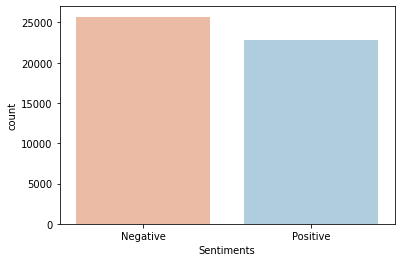

In [493]:
# View distribution in a countplot
sns.countplot(x='Sentiments', data=df, palette='RdBu')

My model predicts that 52.92% of the messages in the NUS SMS Corpus are Negative.

Now I want to compare sentiment by country. To make this easier, I will transform my sentiment into a numeric variable. I will assign Positive messages '1' and Negative messages '-1'. 

In [494]:
df['Sentiments_score'] = df['Sentiments'].apply(lambda x: 1 if x == 'Positive' else -1)
df.head()

,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiments,Sentiments_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",Positive,1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative,-1


Now I will group by country and use the `.mean()` method to get the average sentiment score for each country.

In [495]:
score_by_country = df.groupby(['country']).Sentiments_score.mean().reset_index()
score_by_country

,country,Sentiments_score
0,Australia,0.111111
1,Bangladesh,-0.047619
2,Barbados,-0.250000
3,Canada,-0.141414
4,China,0.177570
5,France,-0.200000
6,Ghana,0.000000
7,Hungary,-0.142857
8,India,0.154552
9,Indonesia,-0.166667


In [496]:
score_by_country.sort_values(by='Sentiments_score')

,country,Sentiments_score
13,Lebanon,-1.000000
25,Slovenia,-0.600000
22,Romania,-0.555556
11,Jamaica,-0.500000
19,Nigeria,-0.400000
14,Macedonia,-0.400000
21,Philippines,-0.253731
2,Barbados,-0.250000
26,Spain,-0.200000
5,France,-0.200000


<AxesSubplot:xlabel='country', ylabel='Sentiments_score'>

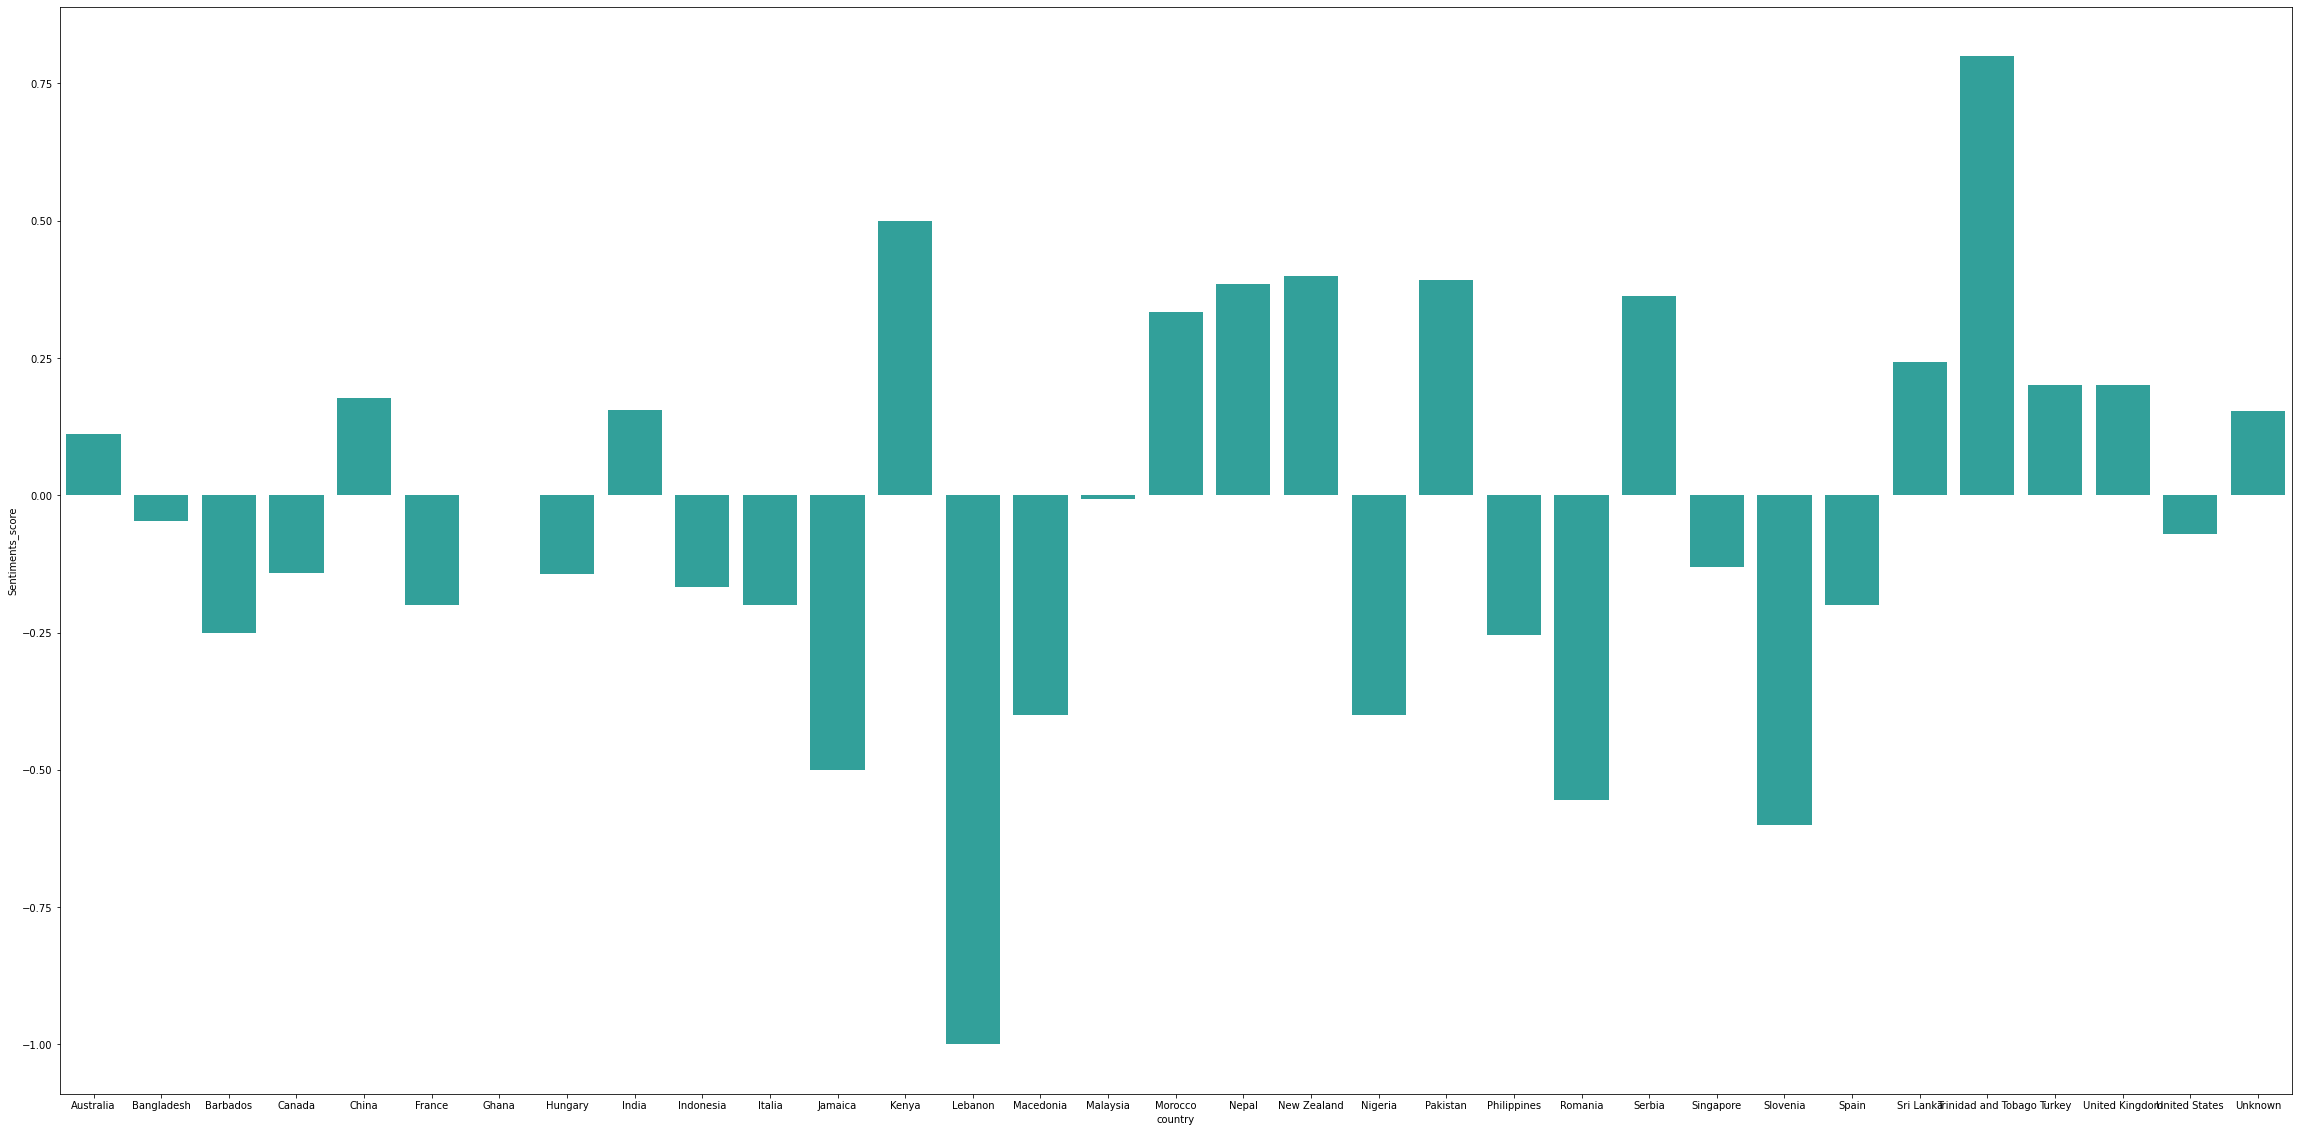

In [497]:
fig, ax=plt.subplots(figsize=(40,20))
sns.barplot(x='country', y='Sentiments_score', data = score_by_country, ax= ax, color= 'lightseagreen' )